## Compare KNN and Logitic Regression with Grid Search

### Load Dataset

In [1]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [33]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Get Samples

In [34]:
x_sample = X[:5000]
y_sample = y[:5000]

In [35]:
print(x_sample.shape)
print(y_sample.shape)

(5000, 784)
(5000,)


In [36]:
print("Original target variable:")
print(np.unique(y_sample))

Original target variable:
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Normalization

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)
scale_x_sample = scaler.fit_transform(x_sample)

##### Get Best Parameters of KNN Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

params = {
    "weights": ['uniform', 'distance'],
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}


knn_gs = GridSearchCV(model, verbose=2, scoring="accuracy", param_grid=params)

In [48]:
knn_gs.fit(scale_x_sample, y_sample)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.3s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.2s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.3s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.3s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.3s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.4s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.2s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.2s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.3s
[CV] END .....algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.2s
[CV] END .....algorithm=auto, n_neighbors=2, w

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [49]:
print(knn_gs.best_params_)
print(knn_gs.best_score_)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
0.8943999999999999


##### best model of Logistic Regression acording to [this ripo file](https://github.com/HB2102/logistic_regression_grid_search_test) for MNIST dataset:
- c = 0.35
- max_iter = 200
- solver = 'saga'

In [50]:
from sklearn.linear_model import LogisticRegression
sample_numbers = [200, 500, 1000, 2000, 6000]
models = [
    KNeighborsClassifier(n_neighbors=4, algorithm='auto', weights='distance'), 
    LogisticRegression(solver='saga', C=0.35, max_iter=200)
]

data = []

#### test different models with different sample numbers

In [51]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import time

for n_smap in sample_numbers:
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    rnd_train_idx = np.random.randint(0,70000, n_smap)
    
    for i in rnd_train_idx:
        x_train.append(X[i])
        y_train.append(y[i])

    rnd_test_idx = np.random.randint(0,70000, n_smap)
    for i in rnd_test_idx:
        x_test.append(X[i])
        y_test.append(y[i])


    for model in models:
        print(model.__class__.__name__, end=" ")
        t = time.time()
        model.fit(np.array(x_train), np.array(y_train))
        train_time = time.time() - t

        t = time.time()
        predict = model.predict(np.array(x_test))
        predict_time = time.time() - t

        f1 = f1_score(np.array(y_test), predict, average="weighted")
        
        model_data = {
            'model': model.__class__.__name__,
            'samples': n_smap,
            'train_time': train_time,
            'predict_time': predict_time,
            'f1_score': f1,
        }

        data.append(model_data)





KNeighborsClassifier LogisticRegression 

/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KNeighborsClassifier LogisticRegression 

/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KNeighborsClassifier LogisticRegression 

/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KNeighborsClassifier LogisticRegression 

/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KNeighborsClassifier LogisticRegression 

/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### convert reults into dataset

In [52]:
dataset = pd.DataFrame(data)

In [53]:
dataset

,model,samples,train_time,predict_time,f1_score
0,KNeighborsClassifier,200,0.004257,0.025638,0.765531
1,LogisticRegression,200,2.097392,0.009368,0.811254
2,KNeighborsClassifier,500,0.013455,0.067800,0.870089
3,LogisticRegression,500,4.946507,0.015974,0.866228
4,KNeighborsClassifier,1000,0.032585,0.119973,0.892785
5,LogisticRegression,1000,9.398128,0.016509,0.853261
6,KNeighborsClassifier,2000,0.036543,0.446007,0.918464
7,LogisticRegression,2000,18.738589,0.037414,0.897349
8,KNeighborsClassifier,6000,0.086413,3.955845,0.940690
9,LogisticRegression,6000,56.148533,0.098843,0.891324


### save dataset

In [54]:
dataset.to_csv("comparison_data.csv", index=False)

### split dataset by model

In [55]:
import matplotlib.pyplot as plt

knn_df = dataset[dataset['model']=='KNeighborsClassifier']
logestic_regression_df = dataset[dataset['model']=='LogisticRegression']

In [56]:
knn_df

,model,samples,train_time,predict_time,f1_score
0,KNeighborsClassifier,200,0.004257,0.025638,0.765531
2,KNeighborsClassifier,500,0.013455,0.067800,0.870089
4,KNeighborsClassifier,1000,0.032585,0.119973,0.892785
6,KNeighborsClassifier,2000,0.036543,0.446007,0.918464
8,KNeighborsClassifier,6000,0.086413,3.955845,0.940690


In [57]:
logestic_regression_df

,model,samples,train_time,predict_time,f1_score
1,LogisticRegression,200,2.097392,0.009368,0.811254
3,LogisticRegression,500,4.946507,0.015974,0.866228
5,LogisticRegression,1000,9.398128,0.016509,0.853261
7,LogisticRegression,2000,18.738589,0.037414,0.897349
9,LogisticRegression,6000,56.148533,0.098843,0.891324


## Comparision

### Train Time an Predict Time Comparision

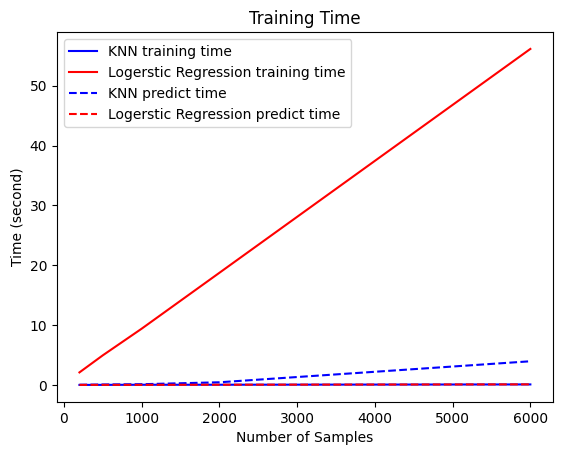

In [58]:
plt.title('Training Time')
plt.plot(knn_df['samples'], knn_df['train_time'] , color='blue', label='KNN training time')
plt.plot(logestic_regression_df['samples'], logestic_regression_df['train_time'] ,color='red' , label='Logerstic Regression training time')
plt.plot(knn_df['samples'], knn_df['predict_time'] ,'b--', label='KNN predict time')
plt.plot(logestic_regression_df['samples'], logestic_regression_df['predict_time'] ,'r--' , label='Logerstic Regression predict time')
plt.xlabel('Number of Samples')
plt.ylabel('Time (second)')
plt.legend()
plt.show()

### F1 Score Comparision

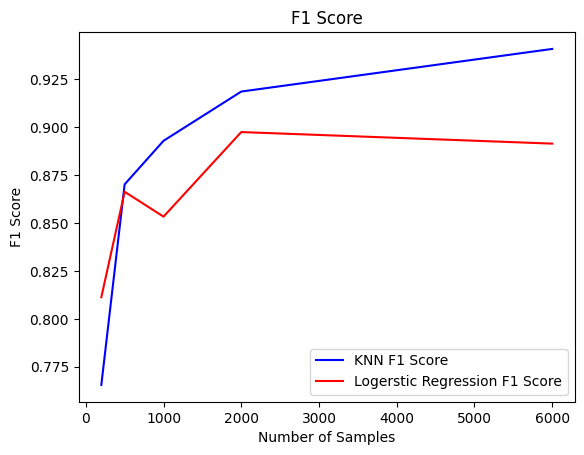

In [59]:
plt.title('F1 Score')
plt.plot(knn_df['samples'], knn_df['f1_score'] , color='blue', label='KNN F1 Score')
plt.plot(logestic_regression_df['samples'], logestic_regression_df['f1_score'] ,color='red' , label='Logerstic Regression F1 Score')
plt.xlabel('Number of Samples')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

### KNN neighbors statistic

In [61]:
neighbors = np.arange(1,11)
n_smap = 5000
knn_data = []

for j in neighbors:
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    rnd_train_idx = np.random.randint(0,70000, n_smap)
    
    for i in rnd_train_idx:
        x_train.append(X[i])
        y_train.append(y[i])

    rnd_test_idx = np.random.randint(0,70000, n_smap)
    for i in rnd_test_idx:
        x_test.append(X[i])
        y_test.append(y[i])
    
    t = time.time()
    model = KNeighborsClassifier(n_neighbors=j)
    model.fit(np.array(x_train), np.array(y_train))
    train_time = time.time() - t

    t = time.time()
    predict = model.predict(np.array(x_test))
    predict_time = time.time() - t

    f1 = f1_score(np.array(y_test), predict, average="weighted")
    
    model_data = {
        'neighbors': j,
        'samples': n_smap,
        'train_time': train_time,
        'predict_time': predict_time,
        'f1_score': f1,
    }

    knn_data.append(model_data)




### save the knn data info

In [62]:
knn_dataset = pd.DataFrame(knn_data)

knn_dataset

,neighbors,samples,train_time,predict_time,f1_score
0,1,5000,0.077134,2.987083,0.946623
1,2,5000,0.051915,2.387039,0.928431
2,3,5000,0.065289,2.310525,0.929324
3,4,5000,0.070861,2.366388,0.930916
4,5,5000,0.068790,2.234075,0.930017
5,6,5000,0.060905,2.415217,0.931721
6,7,5000,0.068718,2.318191,0.933547
7,8,5000,0.068173,2.550230,0.924371
8,9,5000,0.082671,2.530771,0.925584
9,10,5000,0.077885,2.038137,0.923843


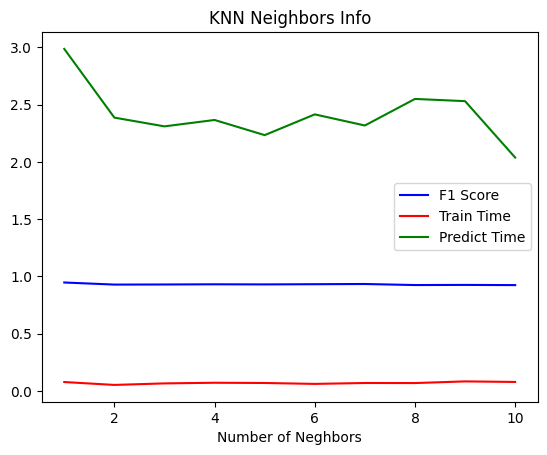

In [65]:
plt.title('KNN Neighbors Info')
plt.plot(knn_dataset['neighbors'], knn_dataset['f1_score'] , color='blue', label='F1 Score')
plt.plot(knn_dataset['neighbors'], knn_dataset['train_time'], color='red' , label='Train Time')
plt.plot(knn_dataset['neighbors'], knn_dataset['predict_time'], color='green' , label='Predict Time')
plt.xlabel('Number of Neghbors')
plt.legend()
plt.show()

### Build Final KNN Model

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=52, stratify=y)

In [67]:
knn = KNeighborsClassifier(n_neighbors=4, algorithm='auto', weights='distance')


In [68]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

### Predict Model

In [69]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [70]:
np.array(y_pred_test).shape

(14000,)

In [71]:
from sklearn.metrics import f1_score

acc_train = f1_score(y_train, y_pred_train, average='weighted')
acc_test = f1_score(y_test, y_pred_test, average='weighted')

acc_train * 100, acc_test * 100

(100.0, 94.8870720795054)

### Save Model

In [72]:
import pickle

with open('final_knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)